In [ ]:
import matplotlib
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

from sklearn.decomposition import PCA

In [53]:
sns.set_context('talk')
sns.set_style('white')

pd.options.mode.chained_assignment = None  # default='warn'

In [25]:
with open("4strains.prof") as f:
    next(f)
    lines = f.readlines()
    
    ideal = lines[:4]
    ideal = [list(map(float, s.split()[1:-1])) for s in ideal]
    print(ideal)
    
    we = lines[4:8]
    we = [list(map(float, s.split()[1:-1])) for s in we]
    print(we)

[[0.25, 0.16, 1.0, 0.8, 0.65, 0.47, 0.21, 0.29, 0.62, 0.25, 0.59], [0.71, 0.74, 0.0, 0.12, 0.18, 0.02, 0.13, 0.63, 0.23, 0.06, 0.0], [0.03, 0.1, 0.0, 0.09, 0.17, 0.02, 0.05, 0.07, 0.15, 0.03, 0.04], [0.0, 0.0, 0.0, 0.0, 0.0, 0.49, 0.62, 0.0, 0.0, 0.66, 0.37]]
[[0.3, 0.26, 0.9, 0.9, 0.83, 0.51, 0.27, 0.37, 0.78, 0.29, 0.65], [0.57, 0.6, 0.03, 0.08, 0.12, 0.01, 0.07, 0.52, 0.16, 0.02, 0.0], [0.14, 0.14, 0.03, 0.03, 0.05, 0.03, 0.08, 0.11, 0.06, 0.05, 0.01], [0.0, 0.0, 0.03, 0.0, 0.0, 0.45, 0.59, 0.0, 0.0, 0.64, 0.34]]


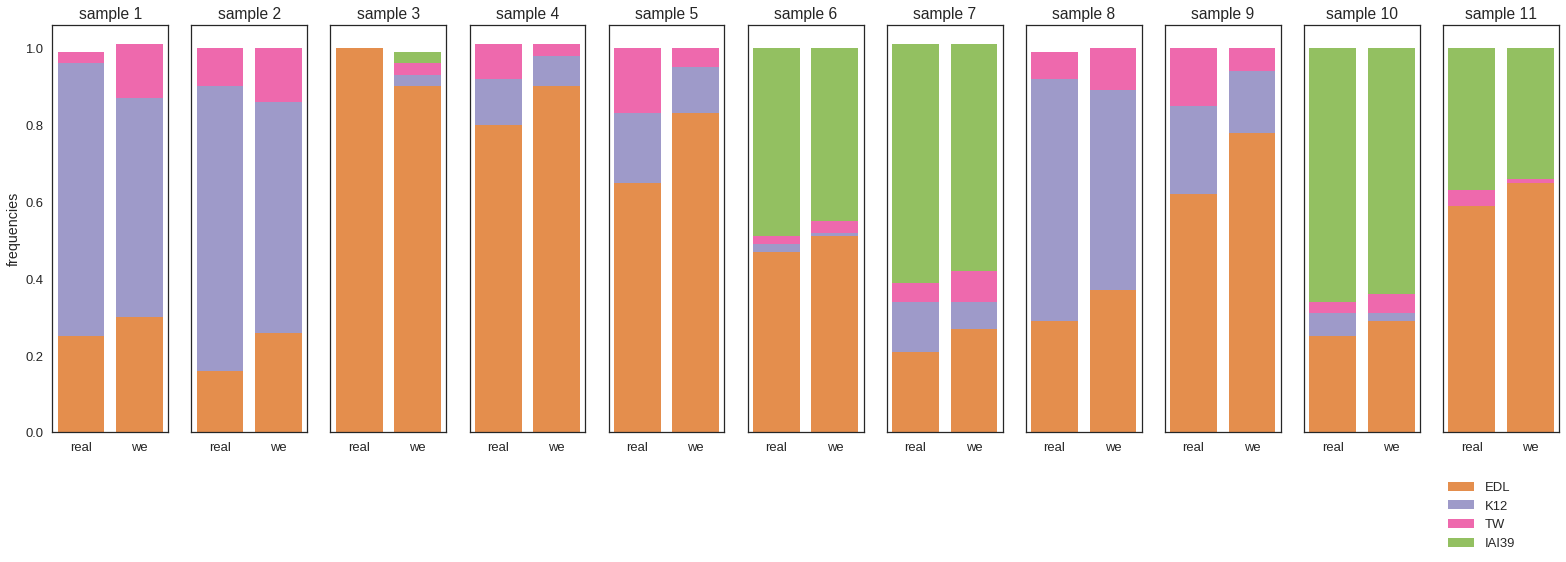

In [92]:
from matplotlib import pyplot as plt
import numpy as np

cmap = plt.cm.Dark2

X = [0, 1]
X_names = ["real", "we"]


f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11) = plt.subplots(1, 11, figsize=(27,7.5), sharey=True)

axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11]

error = 0

for i in range(len(axs)):
    
    data1 = [ideal[0][i], we[0][i]]
    data2 = [ideal[1][i], we[1][i]]
    data3 = [ideal[2][i], we[2][i]]
    data4 = [ideal[3][i], we[3][i]]
    
    error += abs(data1[0]-data1[1]) + abs(data2[0]-data2[1]) + abs(data3[0]-data3[1]) + abs(data4[0]-data4[1])
    
    if i == 0:
        axs[i].set_ylabel("frequencies")

    axs[i].bar(X, data1, label='EDL', alpha=0.7, color=cmap(0.2))
    axs[i].bar(X, data2, bottom=data1, label='K12', alpha=0.7, color=cmap(0.3))
    axs[i].bar(X, data3, bottom=np.array(data1)+np.array(data2), label='TW', alpha=0.7, color=cmap(0.4))
    axs[i].bar(X, data4, bottom=np.array(data1)+np.array(data2)+np.array(data3),
               label='IAI39', alpha=0.7, color=cmap(0.6))
    plt.sca(axs[i])
    plt.xticks(X, X_names)
    plt.title("sample %s" % (i+1))

    if i == 10:
        plt.legend(loc = (0, -0.3))

plt.show()

In [76]:
round(error/(11*4),2)

0.05

In [58]:
cmap[0]

TypeError: 'ListedColormap' object does not support indexing